In [326]:
import numpy as np
import pandas as pd
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt # For creating plots
import xgboost as xgb
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import Imputer

import numpy as np
from sklearn.linear_model import LinearRegression
data = pd.read_csv("kv_ee_clean_01052020.csv" )

df_rent=data.loc[(data.listing_type == 'rent') & (data.obj_type =="apartment")]

df_rent=df_rent.drop(['wasching_machine', 'oven', 'fridge', 'bedrooms', 'san_room', 'state', 'cat_num', 'date', 'listing_type', 'obj_type', 'ad_id', 'real_estate_num', 'floors', 'property', 'shower' ], axis=1)

df_rent=df_rent.fillna(0)
#df_rent.loc[df_rent.heating.str.contains('te'), 'heating'] = 1
df_rent['heating'] = np.where(df_rent['heating'].str.contains('te|p|er|n'), 1, df_rent['heating'])
df_rent['kitchen'] = np.where(df_rent['kitchen'].str.contains('e|a|i|o|ö'), 1, df_rent['kitchen'])
#df_rent['state'] = np.where(df_rent['state'].str.contains('Valmis'), 1, df_rent['state'])
df_rent.columns
#df_rent.heating.unique()




Index(['price', 'pricesqm', 'lat', 'long', 'rooms', 'area', 'total_area',
       'floor', 'builtyear', 'condition', 'en_mark', 'bills_summer',
       'bills_winter', 'parking', 'sauna', 'bathtub', 'kitchen', 'heating',
       'garage', 'balcony', 'lift'],
      dtype='object')

In [327]:
df_rent_apt = df_rent.copy()
df_rent_apt=df_rent_apt[df_rent_apt.price<9000]
print(df_rent_apt.price.max())
#converting categorical values
df_rent_apt = pd.get_dummies(df_rent_apt)
df_rent_apt.head()

6000.0


,price,pricesqm,lat,long,rooms,area,total_area,floor,builtyear,bills_summer,...,en_mark_F,en_mark_G,en_mark_H,en_mark_P,parking_0,parking_maja,parking_tasuline,parking_tasuta,kitchen_1,heating_1
2,650.0,13.00,59.430729,24.726902,2.0,50.1,0.0,2.0,2013.0,0.0,...,0,0,0,0,1,0,0,0,1,1
7,700.0,13.50,59.428215,24.778075,3.0,51.7,0.0,1.0,2017.0,75.0,...,0,0,0,0,0,0,1,0,1,1
17,150.0,12.50,59.411850,24.746365,1.0,12.0,0.0,2.0,2012.0,0.0,...,0,0,0,0,0,0,0,1,1,1
30,450.0,9.18,59.459790,24.880667,2.0,49.0,0.0,2.0,1979.0,0.0,...,0,0,0,0,0,0,0,1,1,1
39,760.0,7.83,59.429538,24.727367,3.0,97.0,0.0,3.0,2001.0,0.0,...,0,0,0,0,0,0,0,1,1,1


In [361]:
X = df_rent_apt.drop(['price'],axis=1) #dropping target variable
y = df_rent_apt.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)



reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.4615586631388286

In [362]:
y_pred=reg.predict(X_test)

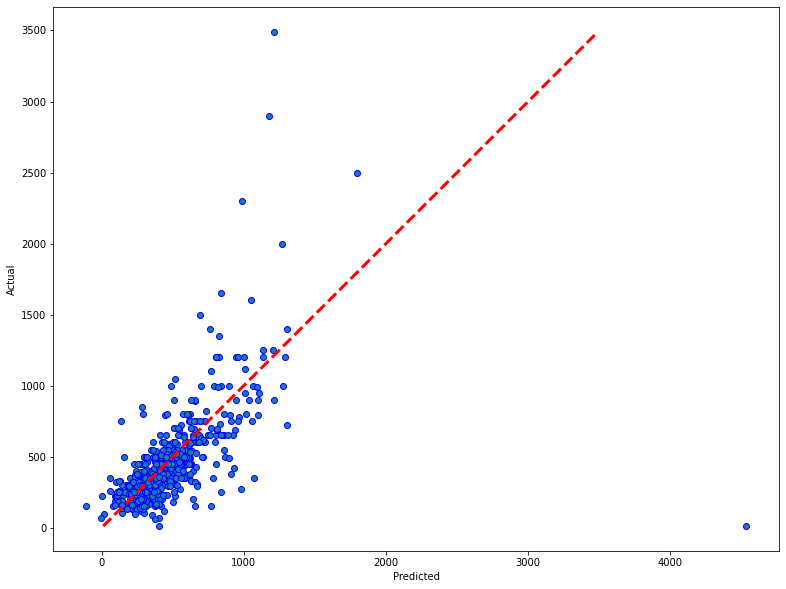

In [330]:


fig, ax = plt.subplots(figsize=(13,10))

ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.show()

In [395]:
# model evaluation for testing set
from sklearn import metrics 
mae_arr=[]
model_name=[]
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
#acc = metrics.accuracy_score(y_test, y_pred)
mae_arr.append(mae)
model_name.append("Logistic Regression")
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 137.50025058716687
MSE is 80280.92566488025
R2 score is 0.21323664054237879


In [397]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

NN_model.fit(X_train, y_train, epochs=500, batch_size=16, validation_split = 0.1, callbacks=callbacks_list)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 128)               5248      
_________________________________________________________________
dense_66 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_67 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_68 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 257       
Total params: 170,113
Trainable params: 170,113
Non-trainable params: 0
_________________________________________________________________
Train on 2189 samples, validate on 244 samples
Epoch 1/500
2189/2189 [==============================] - 1s 627us/step - loss: 290.4497 -

2189/2189 [==============================] - 1s 299us/step - loss: 33.8436 - mean_absolute_error: 33.8436 - val_loss: 65.1648 - val_mean_absolute_error: 65.1648

Epoch 00029: val_loss did not improve from 43.30535
Epoch 30/500
2189/2189 [==============================] - 1s 291us/step - loss: 33.7161 - mean_absolute_error: 33.7161 - val_loss: 48.0776 - val_mean_absolute_error: 48.0776

Epoch 00030: val_loss did not improve from 43.30535
Epoch 31/500
2189/2189 [==============================] - 1s 290us/step - loss: 33.2280 - mean_absolute_error: 33.2280 - val_loss: 36.2456 - val_mean_absolute_error: 36.2456

Epoch 00031: val_loss improved from 43.30535 to 36.24563, saving model to Weights-031--36.24563.hdf5
Epoch 32/500
2189/2189 [==============================] - 1s 293us/step - loss: 32.8777 - mean_absolute_error: 32.8777 - val_loss: 57.7997 - val_mean_absolute_error: 57.7997

Epoch 00032: val_loss did not improve from 36.24563
Epoch 33/500
2189/2189 [==============================] 

2189/2189 [==============================] - 1s 285us/step - loss: 27.0923 - mean_absolute_error: 27.0923 - val_loss: 41.5784 - val_mean_absolute_error: 41.5784

Epoch 00064: val_loss did not improve from 27.25898
Epoch 65/500
2189/2189 [==============================] - 1s 287us/step - loss: 24.1552 - mean_absolute_error: 24.1552 - val_loss: 48.5223 - val_mean_absolute_error: 48.5223

Epoch 00065: val_loss did not improve from 27.25898
Epoch 66/500
2189/2189 [==============================] - 1s 291us/step - loss: 24.9253 - mean_absolute_error: 24.9253 - val_loss: 33.5406 - val_mean_absolute_error: 33.5406

Epoch 00066: val_loss did not improve from 27.25898
Epoch 67/500
2189/2189 [==============================] - 1s 291us/step - loss: 25.2940 - mean_absolute_error: 25.2940 - val_loss: 38.6606 - val_mean_absolute_error: 38.6606

Epoch 00067: val_loss did not improve from 27.25898
Epoch 68/500
2189/2189 [==============================] - 1s 292us/step - loss: 26.8229 - mean_absolute_e

2189/2189 [==============================] - 1s 300us/step - loss: 22.5020 - mean_absolute_error: 22.5020 - val_loss: 34.1414 - val_mean_absolute_error: 34.1414

Epoch 00100: val_loss did not improve from 26.11189
Epoch 101/500
2189/2189 [==============================] - 1s 289us/step - loss: 20.1894 - mean_absolute_error: 20.1894 - val_loss: 32.3498 - val_mean_absolute_error: 32.3498

Epoch 00101: val_loss did not improve from 26.11189
Epoch 102/500
2189/2189 [==============================] - 1s 291us/step - loss: 21.4492 - mean_absolute_error: 21.4492 - val_loss: 29.6634 - val_mean_absolute_error: 29.6634

Epoch 00102: val_loss did not improve from 26.11189
Epoch 103/500
2189/2189 [==============================] - 1s 301us/step - loss: 19.3446 - mean_absolute_error: 19.3446 - val_loss: 32.2829 - val_mean_absolute_error: 32.2829

Epoch 00103: val_loss did not improve from 26.11189
Epoch 104/500
2189/2189 [==============================] - 1s 296us/step - loss: 22.8535 - mean_absolu


Epoch 00135: val_loss did not improve from 25.45324
Epoch 136/500
2189/2189 [==============================] - 1s 283us/step - loss: 21.7318 - mean_absolute_error: 21.7318 - val_loss: 29.2917 - val_mean_absolute_error: 29.2917

Epoch 00136: val_loss did not improve from 25.45324
Epoch 137/500
2189/2189 [==============================] - 1s 309us/step - loss: 18.1202 - mean_absolute_error: 18.1202 - val_loss: 27.0730 - val_mean_absolute_error: 27.0730

Epoch 00137: val_loss did not improve from 25.45324
Epoch 138/500
2189/2189 [==============================] - 1s 287us/step - loss: 18.9999 - mean_absolute_error: 18.9999 - val_loss: 43.8281 - val_mean_absolute_error: 43.8281

Epoch 00138: val_loss did not improve from 25.45324
Epoch 139/500
2189/2189 [==============================] - 1s 293us/step - loss: 19.5835 - mean_absolute_error: 19.5835 - val_loss: 21.1953 - val_mean_absolute_error: 21.1953

Epoch 00139: val_loss improved from 25.45324 to 21.19534, saving model to Weights-139--

2189/2189 [==============================] - 1s 300us/step - loss: 18.5156 - mean_absolute_error: 18.5156 - val_loss: 43.8916 - val_mean_absolute_error: 43.8916

Epoch 00171: val_loss did not improve from 21.19534
Epoch 172/500
2189/2189 [==============================] - 1s 292us/step - loss: 18.8196 - mean_absolute_error: 18.8196 - val_loss: 24.5530 - val_mean_absolute_error: 24.5530

Epoch 00172: val_loss did not improve from 21.19534
Epoch 173/500
2189/2189 [==============================] - 1s 297us/step - loss: 18.2456 - mean_absolute_error: 18.2456 - val_loss: 27.0141 - val_mean_absolute_error: 27.0141

Epoch 00173: val_loss did not improve from 21.19534
Epoch 174/500
2189/2189 [==============================] - 1s 294us/step - loss: 19.4634 - mean_absolute_error: 19.4634 - val_loss: 34.7256 - val_mean_absolute_error: 34.7256

Epoch 00174: val_loss did not improve from 21.19534
Epoch 175/500
2189/2189 [==============================] - 1s 294us/step - loss: 18.4307 - mean_absolu

2189/2189 [==============================] - 1s 361us/step - loss: 16.4294 - mean_absolute_error: 16.4294 - val_loss: 25.1962 - val_mean_absolute_error: 25.1962

Epoch 00207: val_loss did not improve from 21.01245
Epoch 208/500
2189/2189 [==============================] - 1s 310us/step - loss: 19.2331 - mean_absolute_error: 19.2331 - val_loss: 25.2445 - val_mean_absolute_error: 25.2445

Epoch 00208: val_loss did not improve from 21.01245
Epoch 209/500
2189/2189 [==============================] - 1s 310us/step - loss: 17.3752 - mean_absolute_error: 17.3752 - val_loss: 23.5632 - val_mean_absolute_error: 23.5632

Epoch 00209: val_loss did not improve from 21.01245
Epoch 210/500
2189/2189 [==============================] - 1s 297us/step - loss: 19.0435 - mean_absolute_error: 19.0435 - val_loss: 32.1172 - val_mean_absolute_error: 32.1172

Epoch 00210: val_loss did not improve from 21.01245
Epoch 211/500
2189/2189 [==============================] - 1s 298us/step - loss: 18.7573 - mean_absolu

2189/2189 [==============================] - 1s 289us/step - loss: 19.1811 - mean_absolute_error: 19.1811 - val_loss: 33.5400 - val_mean_absolute_error: 33.5400

Epoch 00243: val_loss did not improve from 21.01245
Epoch 244/500
2189/2189 [==============================] - 1s 300us/step - loss: 18.5256 - mean_absolute_error: 18.5256 - val_loss: 29.2018 - val_mean_absolute_error: 29.2018

Epoch 00244: val_loss did not improve from 21.01245
Epoch 245/500
2189/2189 [==============================] - 1s 291us/step - loss: 17.3556 - mean_absolute_error: 17.3556 - val_loss: 25.2278 - val_mean_absolute_error: 25.2278

Epoch 00245: val_loss did not improve from 21.01245
Epoch 246/500
2189/2189 [==============================] - 1s 290us/step - loss: 16.2760 - mean_absolute_error: 16.2760 - val_loss: 25.5071 - val_mean_absolute_error: 25.5071

Epoch 00246: val_loss did not improve from 21.01245
Epoch 247/500
2189/2189 [==============================] - 1s 304us/step - loss: 15.3001 - mean_absolu

2189/2189 [==============================] - 0s 214us/step - loss: 16.3186 - mean_absolute_error: 16.3186 - val_loss: 27.4091 - val_mean_absolute_error: 27.4091

Epoch 00279: val_loss did not improve from 21.01245
Epoch 280/500
2189/2189 [==============================] - 0s 212us/step - loss: 17.4653 - mean_absolute_error: 17.4653 - val_loss: 23.6706 - val_mean_absolute_error: 23.6706

Epoch 00280: val_loss did not improve from 21.01245
Epoch 281/500
2189/2189 [==============================] - 0s 210us/step - loss: 15.5657 - mean_absolute_error: 15.5657 - val_loss: 24.1100 - val_mean_absolute_error: 24.1100

Epoch 00281: val_loss did not improve from 21.01245
Epoch 282/500
2189/2189 [==============================] - 0s 213us/step - loss: 15.9944 - mean_absolute_error: 15.9944 - val_loss: 25.5256 - val_mean_absolute_error: 25.5256

Epoch 00282: val_loss did not improve from 21.01245
Epoch 283/500
2189/2189 [==============================] - 1s 292us/step - loss: 20.4895 - mean_absolu

2189/2189 [==============================] - 1s 248us/step - loss: 16.5398 - mean_absolute_error: 16.5398 - val_loss: 22.5354 - val_mean_absolute_error: 22.5354

Epoch 00315: val_loss did not improve from 21.01245
Epoch 316/500
2189/2189 [==============================] - 1s 280us/step - loss: 15.4377 - mean_absolute_error: 15.4377 - val_loss: 24.3248 - val_mean_absolute_error: 24.3248

Epoch 00316: val_loss did not improve from 21.01245
Epoch 317/500
2189/2189 [==============================] - 1s 339us/step - loss: 15.5141 - mean_absolute_error: 15.5141 - val_loss: 25.0373 - val_mean_absolute_error: 25.0373

Epoch 00317: val_loss did not improve from 21.01245
Epoch 318/500
2189/2189 [==============================] - 1s 297us/step - loss: 18.6971 - mean_absolute_error: 18.6971 - val_loss: 25.0943 - val_mean_absolute_error: 25.0943

Epoch 00318: val_loss did not improve from 21.01245
Epoch 319/500
2189/2189 [==============================] - 1s 303us/step - loss: 16.9266 - mean_absolu

2189/2189 [==============================] - 0s 210us/step - loss: 15.1273 - mean_absolute_error: 15.1273 - val_loss: 21.5237 - val_mean_absolute_error: 21.5237

Epoch 00351: val_loss did not improve from 21.01245
Epoch 352/500
2189/2189 [==============================] - 0s 211us/step - loss: 14.8556 - mean_absolute_error: 14.8556 - val_loss: 23.1403 - val_mean_absolute_error: 23.1403

Epoch 00352: val_loss did not improve from 21.01245
Epoch 353/500
2189/2189 [==============================] - 0s 210us/step - loss: 15.4809 - mean_absolute_error: 15.4809 - val_loss: 28.6918 - val_mean_absolute_error: 28.6918

Epoch 00353: val_loss did not improve from 21.01245
Epoch 354/500
2189/2189 [==============================] - 0s 211us/step - loss: 15.8427 - mean_absolute_error: 15.8427 - val_loss: 24.4146 - val_mean_absolute_error: 24.4146

Epoch 00354: val_loss did not improve from 21.01245
Epoch 355/500
2189/2189 [==============================] - 0s 212us/step - loss: 16.4189 - mean_absolu


Epoch 00386: val_loss did not improve from 20.13577
Epoch 387/500
2189/2189 [==============================] - 0s 218us/step - loss: 15.0735 - mean_absolute_error: 15.0735 - val_loss: 29.1009 - val_mean_absolute_error: 29.1009

Epoch 00387: val_loss did not improve from 20.13577
Epoch 388/500
2189/2189 [==============================] - 1s 280us/step - loss: 14.4758 - mean_absolute_error: 14.4758 - val_loss: 23.6042 - val_mean_absolute_error: 23.6042

Epoch 00388: val_loss did not improve from 20.13577
Epoch 389/500
2189/2189 [==============================] - 0s 225us/step - loss: 14.9166 - mean_absolute_error: 14.9166 - val_loss: 35.5719 - val_mean_absolute_error: 35.5719

Epoch 00389: val_loss did not improve from 20.13577
Epoch 390/500
2189/2189 [==============================] - 0s 219us/step - loss: 15.1076 - mean_absolute_error: 15.1076 - val_loss: 21.6560 - val_mean_absolute_error: 21.6560

Epoch 00390: val_loss did not improve from 20.13577
Epoch 391/500
2189/2189 [==========


Epoch 00422: val_loss did not improve from 20.13577
Epoch 423/500
2189/2189 [==============================] - 0s 214us/step - loss: 14.3083 - mean_absolute_error: 14.3083 - val_loss: 21.7531 - val_mean_absolute_error: 21.7531

Epoch 00423: val_loss did not improve from 20.13577
Epoch 424/500
2189/2189 [==============================] - 0s 209us/step - loss: 15.7586 - mean_absolute_error: 15.7586 - val_loss: 22.7085 - val_mean_absolute_error: 22.7085

Epoch 00424: val_loss did not improve from 20.13577
Epoch 425/500
2189/2189 [==============================] - 0s 212us/step - loss: 13.9562 - mean_absolute_error: 13.9562 - val_loss: 24.3796 - val_mean_absolute_error: 24.3796

Epoch 00425: val_loss did not improve from 20.13577
Epoch 426/500
2189/2189 [==============================] - 0s 214us/step - loss: 13.5771 - mean_absolute_error: 13.5771 - val_loss: 27.5438 - val_mean_absolute_error: 27.5438

Epoch 00426: val_loss did not improve from 20.13577
Epoch 427/500
2189/2189 [==========

2189/2189 [==============================] - 0s 215us/step - loss: 15.6808 - mean_absolute_error: 15.6808 - val_loss: 29.6484 - val_mean_absolute_error: 29.6484

Epoch 00458: val_loss did not improve from 19.77996
Epoch 459/500
2189/2189 [==============================] - 0s 206us/step - loss: 12.8016 - mean_absolute_error: 12.8016 - val_loss: 22.7731 - val_mean_absolute_error: 22.7731

Epoch 00459: val_loss did not improve from 19.77996
Epoch 460/500
2189/2189 [==============================] - 0s 214us/step - loss: 15.2782 - mean_absolute_error: 15.2782 - val_loss: 24.3450 - val_mean_absolute_error: 24.3450

Epoch 00460: val_loss did not improve from 19.77996
Epoch 461/500
2189/2189 [==============================] - 0s 208us/step - loss: 15.1226 - mean_absolute_error: 15.1226 - val_loss: 26.4696 - val_mean_absolute_error: 26.4696

Epoch 00461: val_loss did not improve from 19.77996
Epoch 462/500
2189/2189 [==============================] - 0s 211us/step - loss: 14.1410 - mean_absolu

2189/2189 [==============================] - 0s 215us/step - loss: 14.9632 - mean_absolute_error: 14.9632 - val_loss: 26.6158 - val_mean_absolute_error: 26.6158

Epoch 00494: val_loss did not improve from 19.77996
Epoch 495/500
2189/2189 [==============================] - 0s 212us/step - loss: 13.3565 - mean_absolute_error: 13.3565 - val_loss: 23.0259 - val_mean_absolute_error: 23.0259

Epoch 00495: val_loss did not improve from 19.77996
Epoch 496/500
2189/2189 [==============================] - 0s 210us/step - loss: 12.7539 - mean_absolute_error: 12.7539 - val_loss: 28.5145 - val_mean_absolute_error: 28.5145

Epoch 00496: val_loss did not improve from 19.77996
Epoch 497/500
2189/2189 [==============================] - 0s 209us/step - loss: 13.2156 - mean_absolute_error: 13.2156 - val_loss: 24.2349 - val_mean_absolute_error: 24.2349

Epoch 00497: val_loss did not improve from 19.77996
Epoch 498/500
2189/2189 [==============================] - 0s 210us/step - loss: 12.8626 - mean_absolu

In [437]:
#test_=X_test[:1]


#for i, j in zip(predictions, y_test):
    #print(i,j)
#print(test_[:,:2])
#pred=NN_model.predict()

wights_file = 'Weights-433--19.77996.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

predictions = NN_model.predict(X_test)

#for i, j in zip(predictions, y_test):
#    print(i,j)
mae_arr.append(min(NN_model.history.history['val_loss']))
model_name.append("Neural Network")
#print(NN_model.history.history['val_loss'])

In [438]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor()
model.fit(X_train,y_train)

# Get the mean absolute error on the validation data
predicted_prices = model.predict(X_test)
MAE = mean_absolute_error(y_test , predicted_prices)
print('Random forest validation MAE = ', MAE)



mae_arr.append(MAE)
model_name.append("Random Forest Regressor")
#for i, j in zip(predicted_prices, y_test):
#    print(i,j)

Random forest validation MAE =  30.927420361247947


In [439]:
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(X_train,y_train , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X_test)
MAE = mean_absolute_error(y_test , XGBpredictions)
print('XGBoost validation MAE = ',MAE)


mae_arr.append(MAE)
model_name.append("XGBoost")
#for i, j in zip(XGBpredictions, y_test):
#    print(i,j)

XGBoost validation MAE =  34.19175324964601


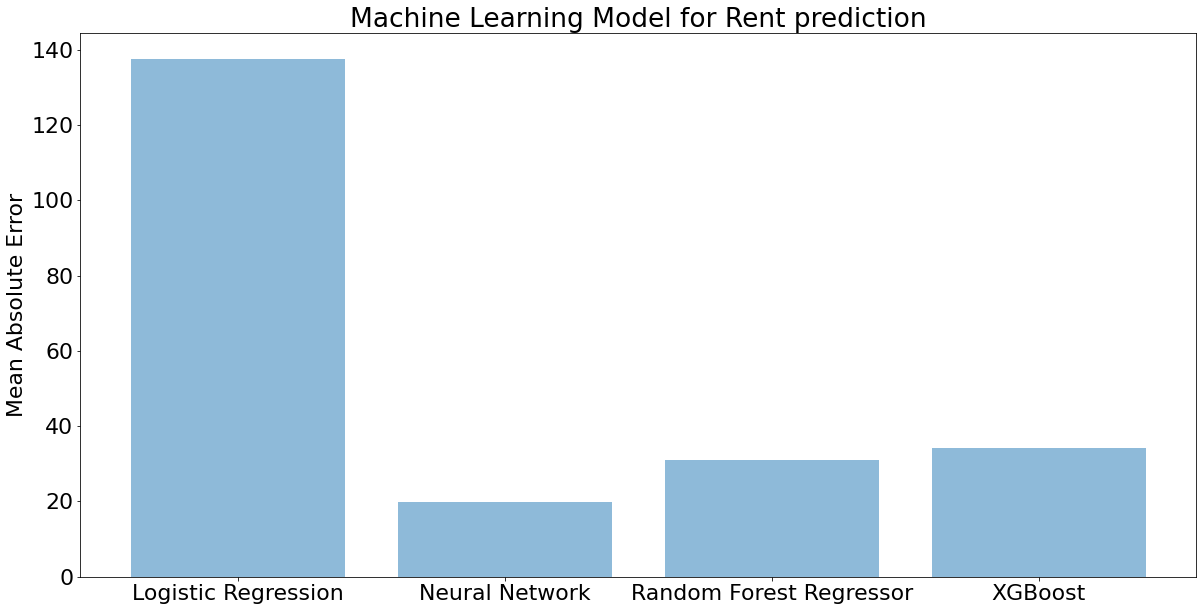

In [445]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.bar(model_name, mae_arr, align='center', alpha=0.5)
#plt.xticks(model_name, mae_arr)
plt.ylabel('Mean Absolute Error')
plt.title('Machine Learning Model for Rent prediction')

plt.show()